In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)






In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from time import perf_counter
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
df = pd.read_csv("data_file.csv", on_bad_lines="skip")
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [7]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)


Shape of the input features: (62485, 17)
Shape of the output features: (62485,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Checking the shape of the training and test sets
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (56236, 17)
Shape of the training output data: (56236,)
Shape of the test input data: (6249, 17)
Shape of the test output data: (6249,)


In [9]:
X = df.iloc[:, 2:-1]
X

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0
62481,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0
62482,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0
62483,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0


**Defining and training and xgboost model**

In [10]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier


In [11]:
X = df.iloc[:, 2:-1].values
y = df.iloc[:,-1].values

In [12]:
type(X)

numpy.ndarray

In [13]:
X

array([[   332,      0,      0, ...,  34112,    672,      0],
       [ 34404,     84, 121728, ...,  16864,   1024,      0],
       [   332,      0,      0, ...,  34112,    672,      0],
       ...,
       [   332,      0,      0, ...,      0,   2364,      0],
       [   332,      0,      0, ...,      0, 130296,      0],
       [   332,      0,      0, ...,      0,   6912,      0]])

In [14]:
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [16]:
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.996 (0.001)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# fit the model on the whole dataset
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred = model.predict(X_test)

In [19]:
preview = pd.DataFrame(data={
    'Predicted results': y_pred,
    'Actual results': y_test
})

preview

,Predicted results,Actual results
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
6244,1,1
6245,0,0
6246,0,0
6247,0,0


In [21]:
import joblib
joblib.dump(model,"model1.pkl")

['model1.pkl']

>10 0.993 (0.001)
>50 0.996 (0.001)
>100 0.996 (0.001)
>250 0.997 (0.001)


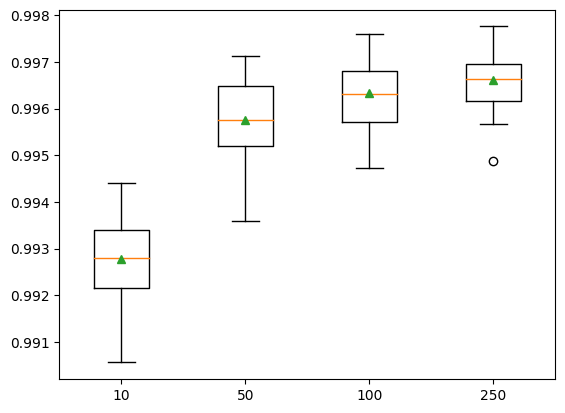

In [22]:
# X = df.iloc[:, 2:-1].values
# y = df.iloc[:,-1].values

# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset(df):
    X = df.iloc[:, 2:-1].values
    y = df.iloc[:,-1].values
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 250]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset(df)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [23]:
loaded_model = joblib.load("model1.pkl")

In [24]:
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
loaded_model.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0])

In [26]:
loaded_model.predict([X_test[0]])[0] == 1

True

In [27]:
joblib.dump(df.columns[2:-1],"features.pkl")

['features.pkl']

In [28]:
list(df.columns[2:-1])

['Machine',
 'DebugSize',
 'DebugRVA',
 'MajorImageVersion',
 'MajorOSVersion',
 'ExportRVA',
 'ExportSize',
 'IatVRA',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'NumberOfSections',
 'SizeOfStackReserve',
 'DllCharacteristics',
 'ResourceSize',
 'BitcoinAddresses']

# ANALYSIS

In [35]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Assuming `results` and `names` are already defined
plt.figure(figsize=(10, 6))
pyplot.boxplot(results, labels=names, showmeans=True)
plt.title('Model Performance Comparison')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.savefig('model_performance_comparison.png')  # Save the figure
plt.close()  # Close the plot to avoid display in notebook

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model again if necessary to get feature importances
model = XGBClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = df.columns[2:-1]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.savefig('feature_importance.png')  # Save the figure
plt.close()  # Close the plot to avoid display in notebook


In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate models and store results
metrics = []
models = get_models()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics.append([
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred)
    ])

# Create DataFrame for heatmap
metrics_df = pd.DataFrame(metrics, columns=['Precision', 'Recall', 'F1 Score', 'Accuracy'], index=models.keys())

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Model Performance Metrics')
plt.savefig('model_performance_metrics.png')  # Save the figure
plt.close()  # Close the plot to avoid display in notebook


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame for heatmap
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.savefig('confusion_matrix.png')  # Save the figure
plt.close()  # Close the plot to avoid display in notebook
